In [ ]:
import os
import glob
import uproot
import mplhep as hep
import numpy as np
import awkward as ak
import boost_histogram as bh
import matplotlib.pyplot as plt
import json

In [ ]:
variables = {
            "vetoNu0": {
                "label": "VetoNu0_charge;",
                "xlabel": "Charge [pC]",
                "title": r"FASER$\nu$ veto station, layer 1",
                "scale": 1,
                "name": "vetoNuCharge0",
            },
            "vetoNu1": {
                "label": "VetoNu1_charge;",
                "xlabel": "Charge [pC]",
                "title": r"FASER$\nu$ veto station, layer 2",
                "scale": 1,
                "name": "vetoNuCharge1",
            },
            "veto10": {
                "label": "VetoSt10_charge;",
                "xlabel": "Charge [pC]",
                "title": "Veto station, layer 1",
                "scale": 1,
                "name": "vetoCharge10",
            },
            "veto20": {
                "label": "VetoSt20_charge;",
                "xlabel": "Charge [pC]",
                "title": "Veto station, layer 2",
                "scale": 1,
                "name": "vetoCharge20",
            },
            "veto21": {
                "label": "VetoSt21_charge;",
                "xlabel": "Charge [pC]",
                "title": "Veto station, layer 3",
                "scale": 1,
                "name": "vetoCharge21",
            },
            "timing0": {
                "label": "Timing0_charge;",
                "xlabel": "Charge [pC]",
                "title": "Trigger station, layer 1",
                "scale": 1,
                "name": "timingCharge0",
            },
            "timing1": {
                "label": "Timing1_charge;",
                "xlabel": "Charge [pC]",
                "title": "Trigger station, layer 2",
                "scale": 1,
                "name": "timingCharge1",
            },
            "timing2": {
                "label": "Timing2_charge;",
                "xlabel": "Charge [pC]",
                "title": "Trigger station, layer 3",
                "scale": 1,
                "name": "timingCharge2",
            },
            "timing3": {
                "label": "Timing3_charge;",
                "xlabel": "Charge [pC]",
                "title": "Trigger station, layer 4",
                "scale": 1,
                "name": "timingCharge3",
            },
            "preshower0": {
                "label": "Preshower0_charge;",
                "xlabel": "Charge [pC]",
                "title": r"Pre-shower station, layer 0",
                "scale": 1,
                "name": "preshowerCharge0",
            },
            "preshower1": {
                "label": "Preshower1_charge;",
                "xlabel": "Charge [pC]",
                "title": r"Pre-shower station, layer 1",
                "scale": 1,
                "name": "preshowerCharge1",
            },
            # "calo0": {
            #     "label": "Calo0_charge;",
            #     "xlabel": "Charge [pC]",
            #     "title": r"Calorimeter, layer 1",
            #     "scale": 1,
            #     "name": "caloCharge0",
            # },
            # "calo1": {
            #     "label": "Calo1_charge;",
            #     "xlabel": "Charge [pC]",
            #     "title": r"Calorimeter, layer 2",
            #     "scale": 1,
            #     "name": "caloCharge1",
            # },
            # "calo2": {
            #     "label": "Calo2_charge;",
            #     "xlabel": "Charge [pC]",
            #     "title": r"Calorimeter, layer 3",
            #     "scale": 1,
            #     "name": "caloCharge2",
            # },
            # "calo3": {
            #     "label": "Calo3_charge;",
            #     "xlabel": "Charge [pC]",
            #     "title": r"Calorimeter, layer 4",
            #     "scale": 1,
            #     "name": "caloCharge3",
            # },
            "theta_x": {
                "label": "Track_theta_x0;",
                "xlabel": r"$\theta_x$ [mrad]",
                "title": "",
                "scale": 1e3,
                "name": "theta_x",
            },
            "theta_y": {
                "label": "Track_theta_y0;",
                "xlabel": r"$\theta_y$ [mrad]",
                "title": "",
                "scale": 1e3,
                "name": "theta_y",
            },
            "pz": {
                "label": "Track_pz_charge0;",
                "xlabel": r"$p_z$ [GeV]",
                "title": "",
                "scale": 1e-3,
                "name": "pz",
            },
            "chi2": {
                "label": "Track_Chi2;",
                "xlabel": r"$\chi^2$",
                "title": "",
                "scale": 1,
                "name": "chi2",
            },
            # "chi2_zoom": {
            #     "label": "Track_Chi2_2;",
            #     "xlabel": r"$\chi^2$",
            #     "title": "",
            #     "scale": 1,
            #     "name": "chi2_2",
            # },
            "ndof": {
                "label": "Track_nDoF;",
                "xlabel": r"nDoF",
                "title": "",
                "scale": 1,
                "name": "nDoF",
            },
            "x": {
                "label": "Track_x0;",
                "xlabel": r"$x$ [mm]",
                "title": "",
                "scale": 1,
                "name": "x",
            },
            "y": {
                "label": "Track_y0;",
                "xlabel": r"$y$ [mm]",
                "title": "",
                "scale": 1,
                "name": "y",
            },
            "theta_x_pos": {
                "label": "Track_theta_x0_pos;",
                "xlabel": r"$\theta_{x, q>0}$ [mrad]",
                "title": "",
                "scale": 1e3,
                "name": "theta_x_pos",
            },
            "theta_x_neg": {
                "label": "Track_theta_x0_neg;",
                "xlabel": r"$\theta_{x, q<0}$ [mrad]",
                "title": "",
                "scale": 1e3,
                "name": "theta_x_neg",
            },
            "theta_y_pos": {
                "label": "Track_theta_y0_pos;",
                "xlabel": r"$\theta_{y, q>0}$ [mrad]",
                "title": "",
                "scale": 1e3,
                "name": "theta_y_pos",
            },
            "theta_y_neg": {
                "label": "Track_theta_y0_neg;",
                "xlabel": r"$\theta_{y, q<0}$ [mrad]",
                "title": "",
                "scale": 1e3,
                "name": "theta_y_neg",
            },
        }

In [ ]:
def plot_histogram(data, runs, variable_dict, output_dir=None, title=None):
    with np.errstate(divide='ignore', invalid='ignore'): # ignore pesky divide by zero warnings

        plt.style.use(hep.style.ATLAS)

        runs_2022 = runs[runs < 1e4]
        runs_2023 = runs[runs > 1e4]
        runs_2023 = runs_2023[runs_2023 < 1.2e4]
        runs_2024 = runs[runs > 1.2e4]

        variable_name = variable_dict['label']    
        hist_branches = [k for k in data.keys() if variable_name in k]

        print(variable_name, hist_branches)

        branches_2022 = []
        for r in runs_2022:
            for h in hist_branches:
                if str(r) in h: 
                    branches_2022.append(h)
                    break

        
        branches_2023 = []
        for r in runs_2023:
            for h in hist_branches:
                if str(r) in h: 
                    branches_2023.append(h)
                    break


        branches_2024 = []
        for r in runs_2024:
            for h in hist_branches:
                if str(r) in h: 
                    branches_2024.append(h)
                    break


        fig, ax = plt.subplots()
        for branch_name in branches_2022:
            try:
                histogam = data[branch_name].to_boost() * variable_dict["scale"]
            except Exception:
                print(f"Branch {branch_name} not found")
                continue
            
            hep.histplot(histogam, linestyle='', histtype='errorbar', ax=ax, color='blue', marker='+', density=True, label="2022")

        for branch_name in branches_2023:
            try:
                histogam = data[branch_name].to_boost() * variable_dict["scale"]
            except Exception:
                print(f"Branch {branch_name} not found")
                continue
            hep.histplot(histogam, linestyle='', histtype='errorbar', ax=ax, color='red', marker='+', density=True, label="2023")
            
        for branch_name in branches_2024:
            try:
                histogam = data[branch_name].to_boost() * variable_dict["scale"]
            except Exception:
                print(f"Branch {branch_name} not found")
                continue
            hep.histplot(histogam, linestyle='', histtype='errorbar', ax=ax, color='orange', marker='+', density=True, label="2024")

        ax.set_title(variable_dict["title"], fontsize=18)
        ax.set_xlabel(variable_dict['xlabel'])
        handles, labels = ax.get_legend_handles_labels()
        unique = [
            (h, l)
            for i, (h, l) in enumerate(zip(handles, labels))
            if l not in labels[:i]
        ]
        ax.legend(*zip(*unique), frameon=False)
        output_file = f"{variable_name}.png"
        if output_dir is not None: 
            os.makedirs(output_dir, exist_ok=True)
            output_file = os.path.join(output_dir, output_file)

        if title is not None: ax.set_title(title, loc="right", fontsize=10)
        plt.savefig(output_file, dpi=300)
        plt.show()


In [ ]:
def get_lumi_dict(grl_dir):
    grl_csvs = glob.glob(os.path.join(grl_dir, "*.csv"))
    lumi_dict = {}
    for grl in grl_csvs:
        with open(grl, 'r') as f:
            for i, line in enumerate(f):
                if i == 0: continue

                spline = line.split(",")
                lumi_rec = float(spline[3])
                run_num = int(spline[0])
                lumi_dict[run_num] = lumi_rec

    return lumi_dict

In [ ]:
lumi_dict = get_lumi_dict("/cvmfs/faser.cern.ch/repo/sw/runlist/v8/")
runs = np.array(list(lumi_dict.keys()))
runs_2022 = runs[runs < 1e4]
runs_2023 = runs[runs > 1e4]
runs_2023 = runs_2023[runs_2023 < 1.2e4]
runs_2024 = runs[runs > 1.2e4]

In [ ]:
with open("bad_runs.json", 'r') as f:
    bad_runs = json.load(f)

bad_runs_list = []
for run_dict in bad_runs:
    bad_runs_list += run_dict['runs']

good_runs = np.array([r for r in runs if r not in bad_runs_list])

In [ ]:
dq_data = uproot.open("2022_2024_r0022_final/data_quality_r0022_final.root")
yields_data = uproot.open("2022_2024_r0022_final/yields_r0022_final.root")

In [ ]:
for variable_dict in variables.values():
    plot_histogram(dq_data, good_runs, variable_dict, output_dir="plots_good_runs")

In [37]:
with open("2024RunSplits.json", 'r') as f:
    run_splits_2024 = json.load(f)

In [38]:
def plot_histogram_for_box_periods(data, periods_list, variable_dict, output_dir=None, title=None):
    with np.errstate(divide='ignore', invalid='ignore'): # ignore pesky divide by zero warnings

        plt.style.use(hep.style.ATLAS)

        variable_name = variable_dict['label']    
        hist_branches = [k for k in data.keys() if variable_name in k]
        fig, ax = plt.subplots()

        for period in periods_list: # apologies for these gross nested loops

            branches = []
            for r in period['runs']:
                for h in hist_branches:
                    if str(r) in h:
                        branches.append(h)
                        break

            for branch_name in branches:

                try:
                    histogam = data[branch_name].to_boost() * variable_dict["scale"]
                except Exception:
                    print(f"Branch {branch_name} not found")
                    continue
                hep.histplot(histogam, linestyle='', histtype='errorbar', ax=ax, marker='+', density=True, label=period['title'], color=period['colour'])


        ax.set_title(variable_dict["title"], fontsize=18)
        ax.set_xlabel(variable_dict['xlabel'])
        handles, labels = ax.get_legend_handles_labels()
        unique = [
            (h, l)
            for i, (h, l) in enumerate(zip(handles, labels))
            if l not in labels[:i]
        ]
        ax.legend(*zip(*unique), frameon=False, fontsize=10)
        output_file = f"{variable_name}.png"
        if output_dir is not None: 
            os.makedirs(output_dir, exist_ok=True)
            output_file = os.path.join(output_dir, output_file)

        if title is not None: ax.set_title(title, loc="right", fontsize=10)
        plt.savefig(output_file, dpi=300)
        plt.show()


In [39]:
box_period_list = []

for run_period in run_splits_2024:
    start_run = int(run_period['StartRun'])
    stop_run = int(run_period['EndRun'])
    good_runs_in_period = good_runs[(good_runs > start_run) & (good_runs < stop_run)]

    box_name = run_period['Box']
    start_date = run_period['Installed']
    end_date = run_period['Removed']

    title = f"{box_name}: {start_date} - {end_date}"

    period_dict = {"name": box_name, "runs": good_runs_in_period, "title": title, "colour": run_period['Colour']}    

    box_period_list.append(period_dict)

    # for variable_dict in variables.values():
    #     plot_histogram(dq_data, good_runs_in_period, variable_dict, output_dir=f"plots_good_runs_{box_name}", title=title)



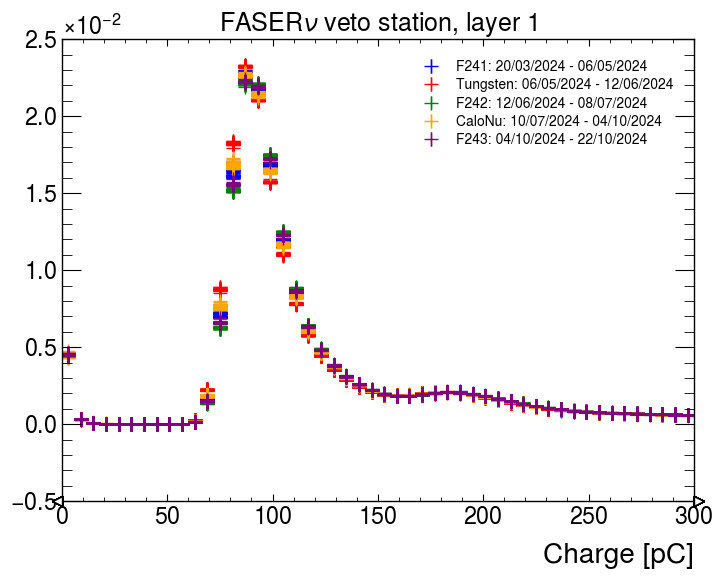

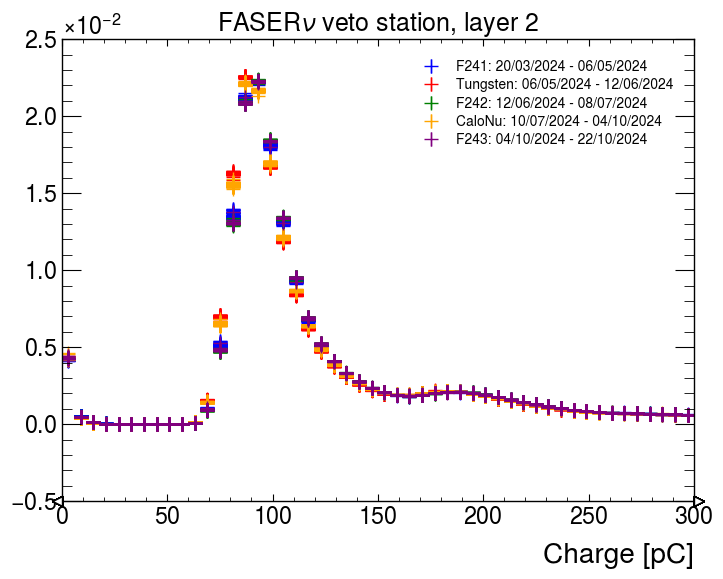

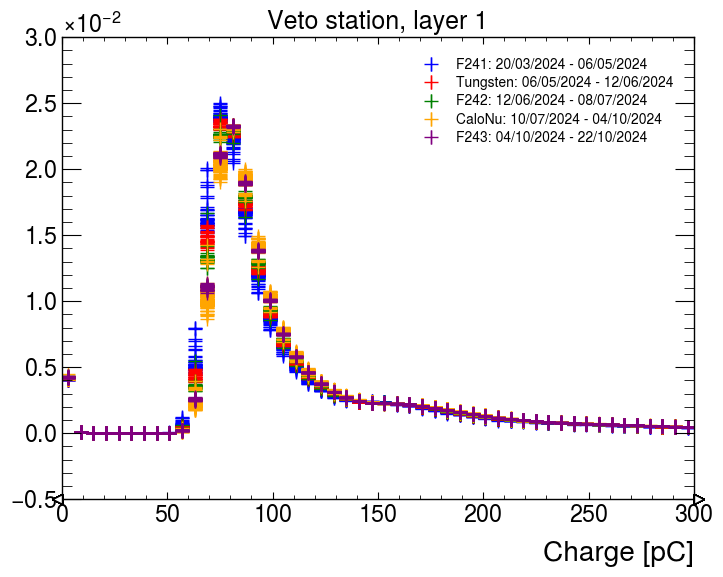

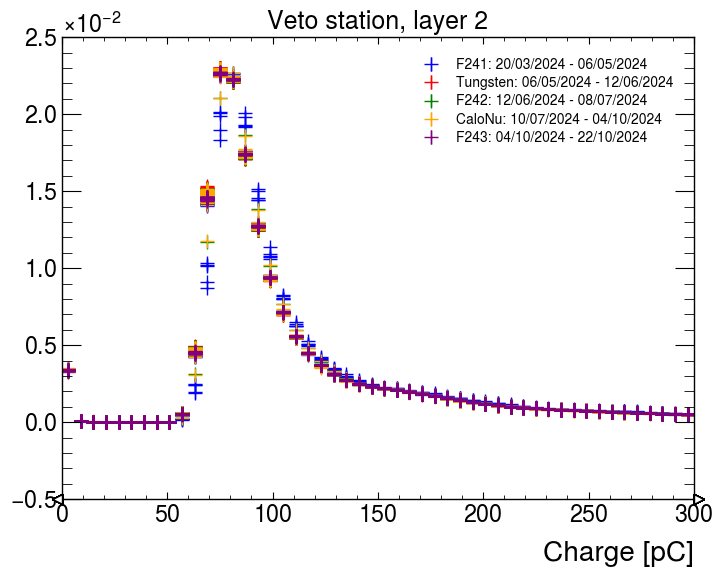

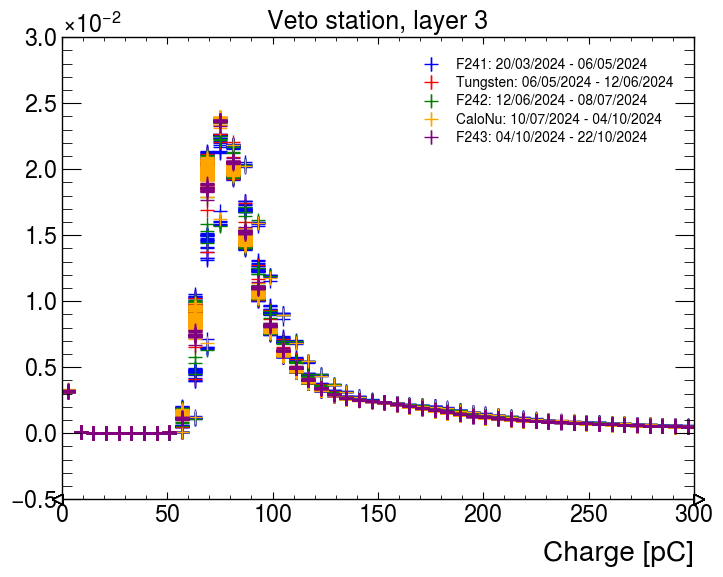

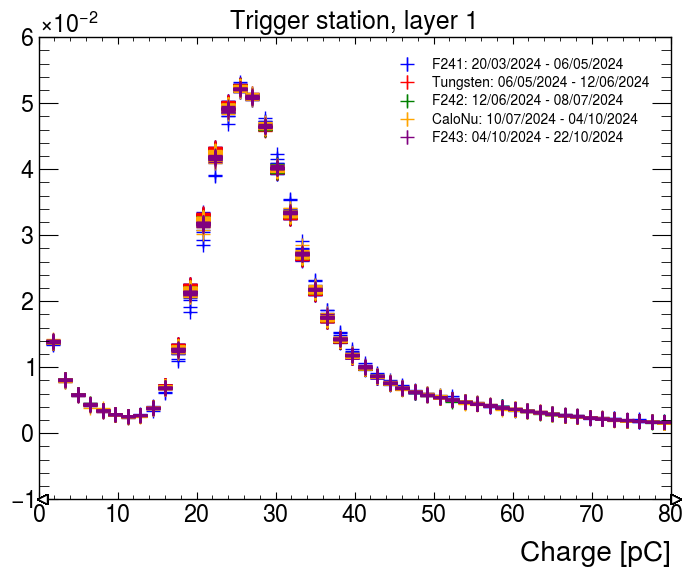

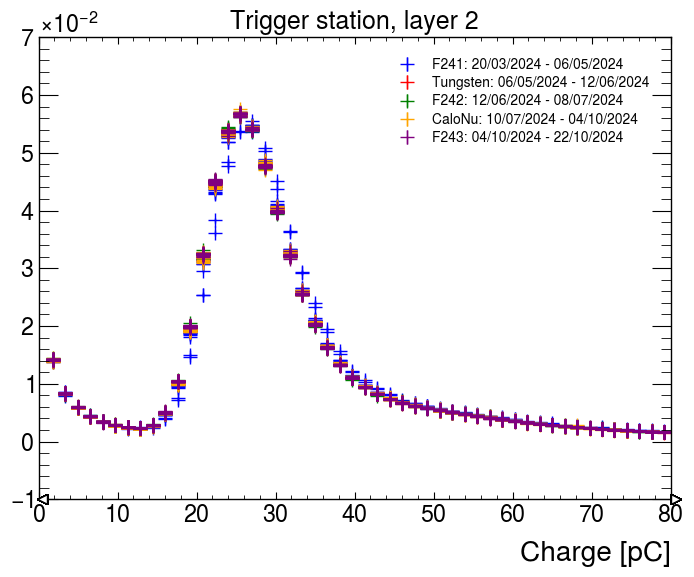

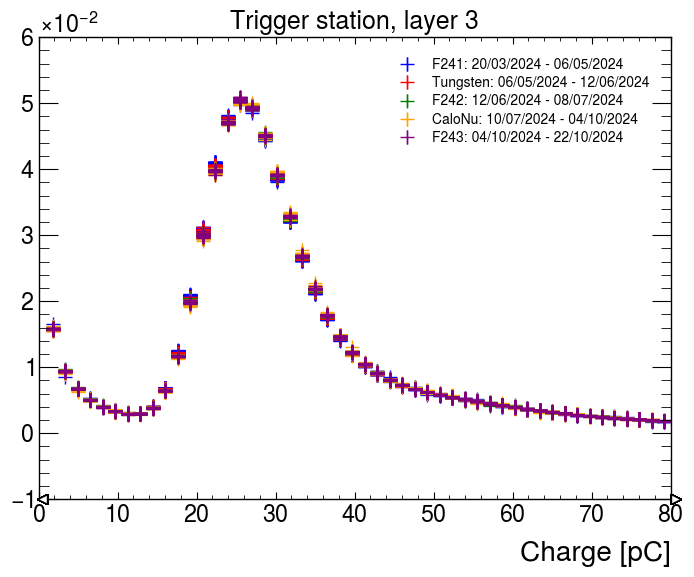

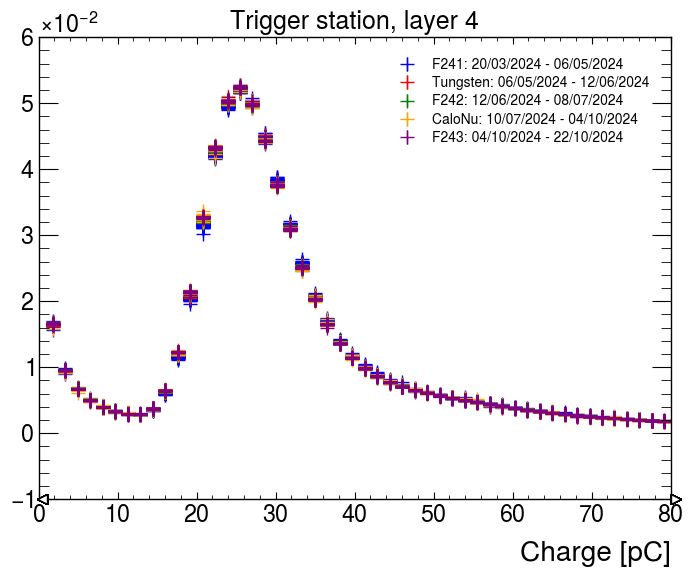

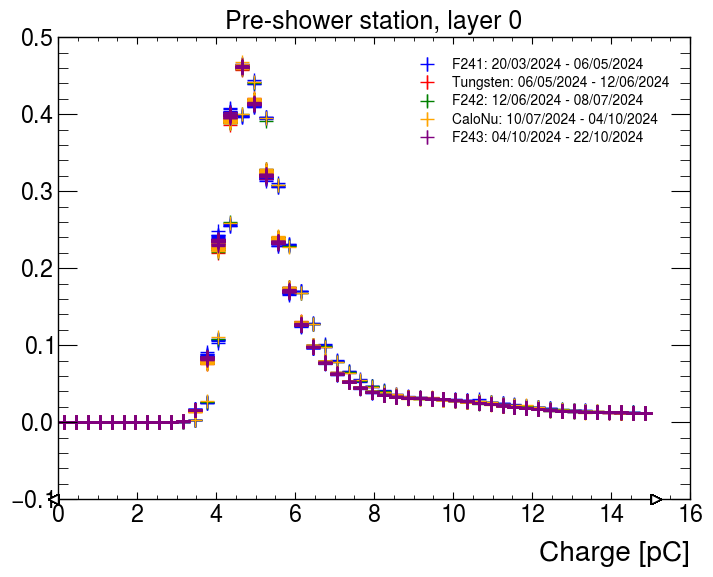

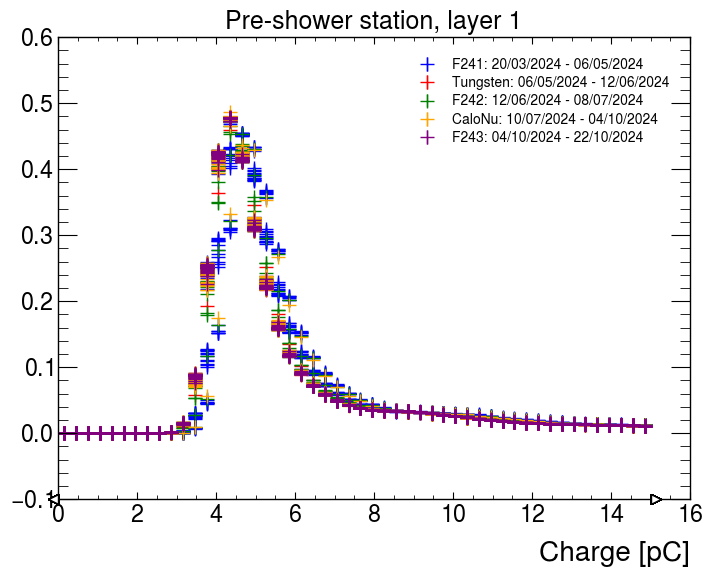

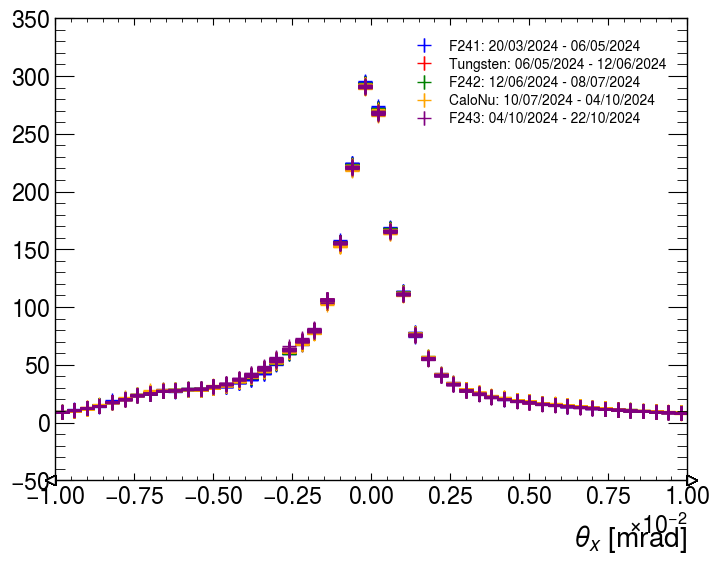

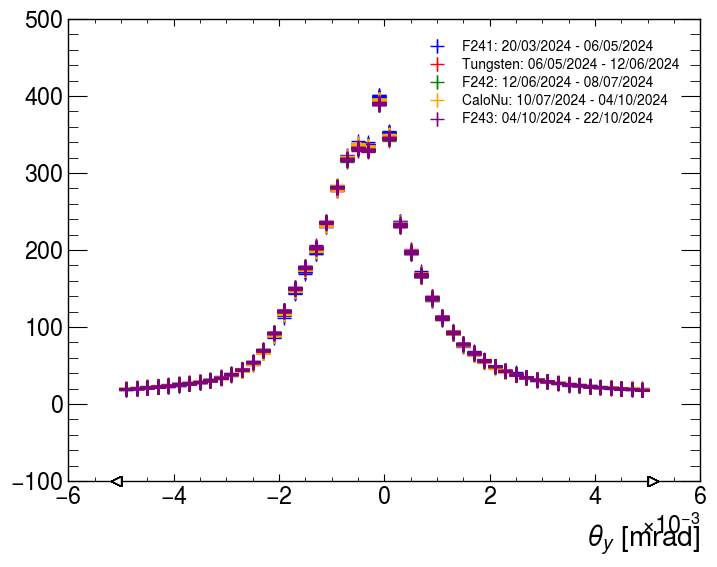

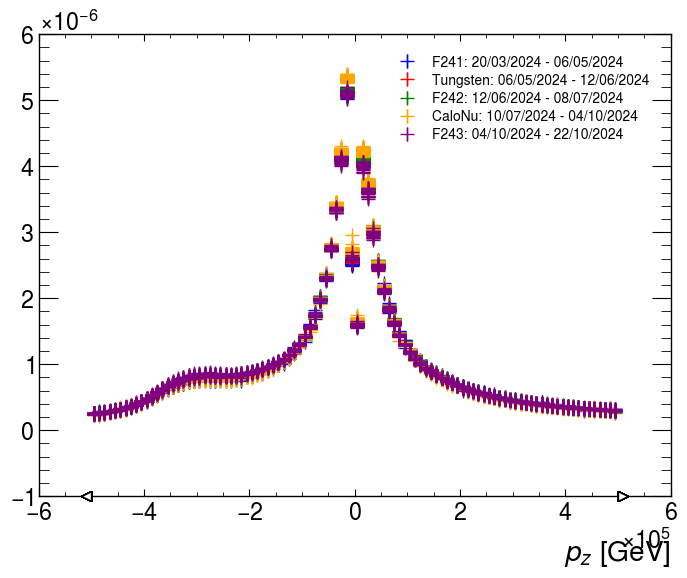

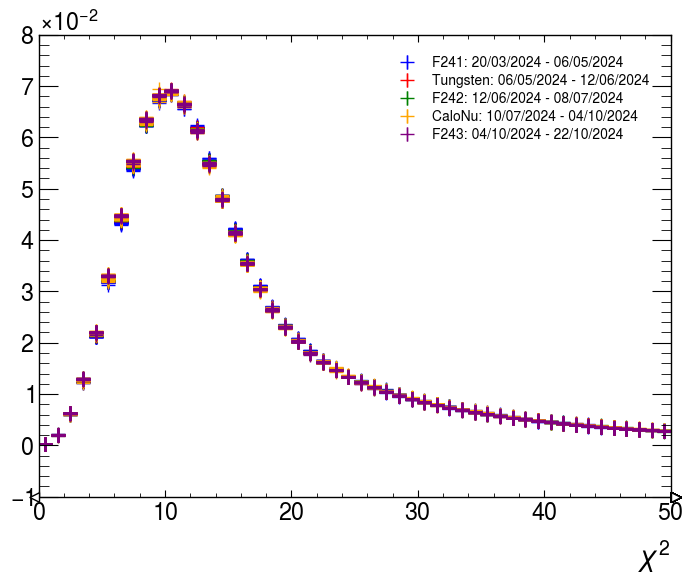

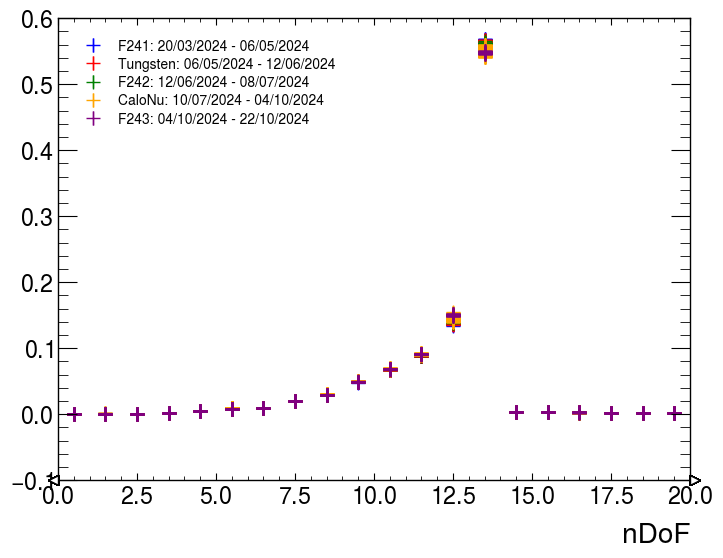

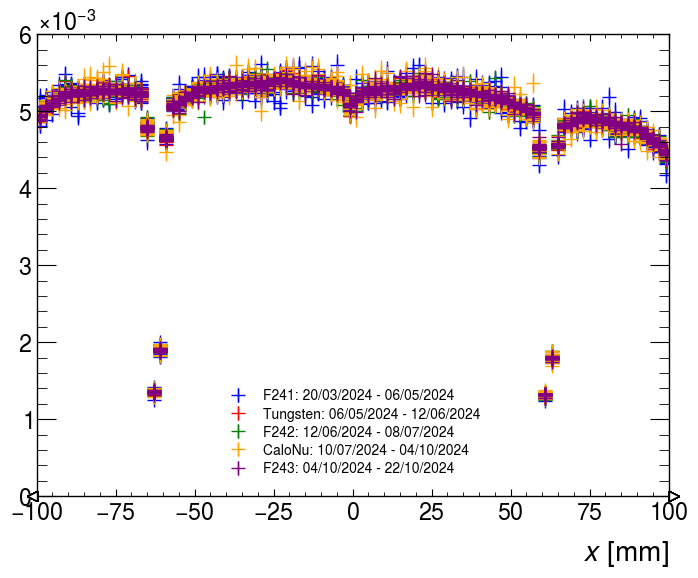

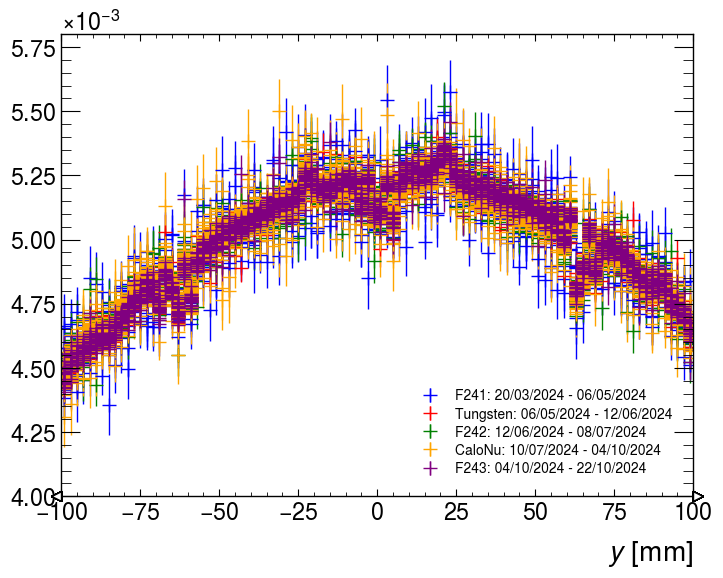

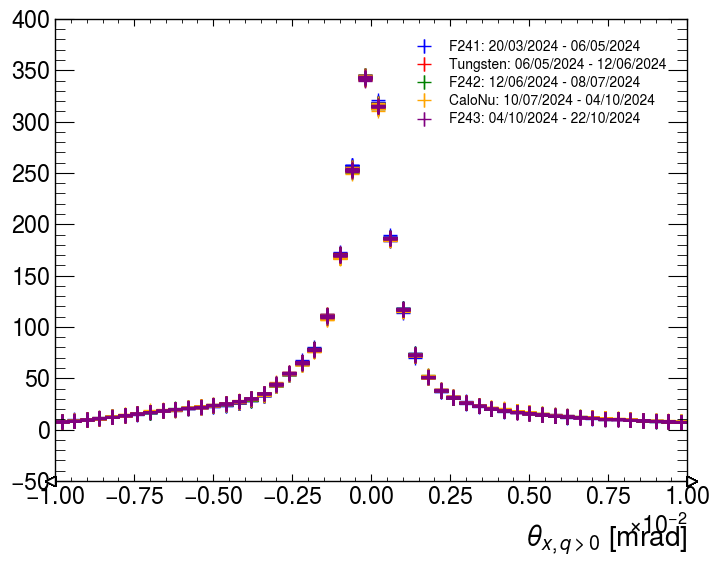

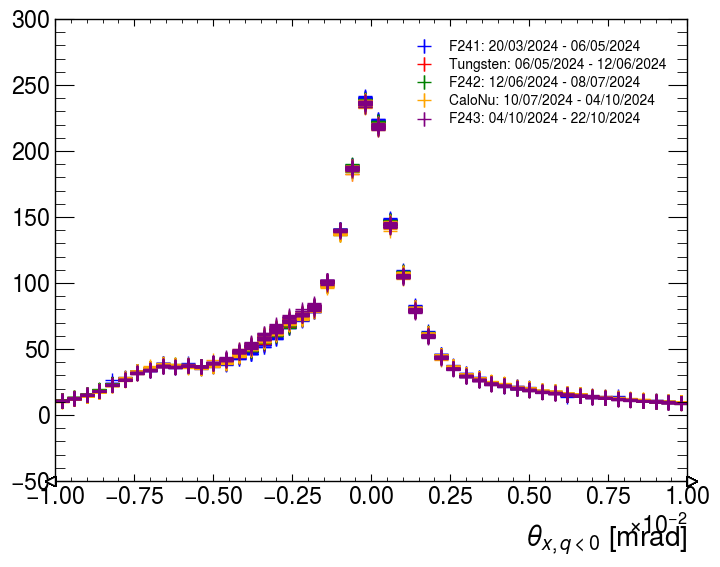

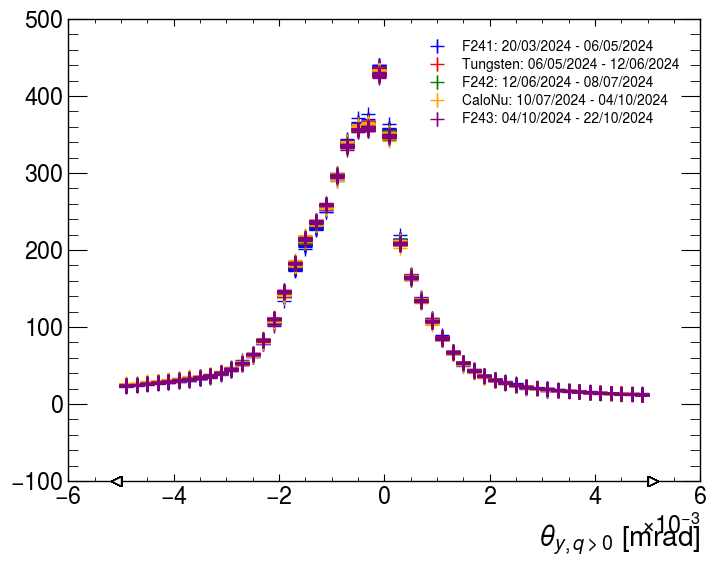

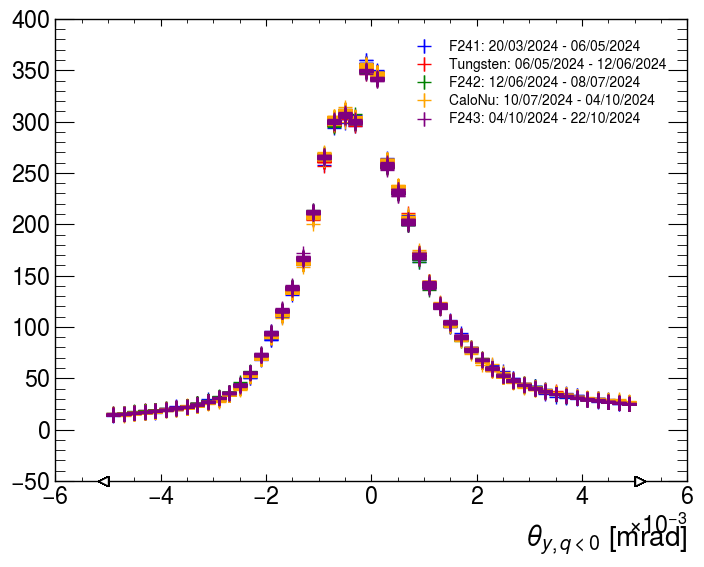

In [40]:
for variable_dict in variables.values():
    plot_histogram_for_box_periods(dq_data, box_period_list, variable_dict, output_dir="plots_good_runs_2024_box_periods")
    # break